In [54]:
#Data Set Information:
#The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).


#The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

#There are four datasets: 
#1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
#2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
#3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
#4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
#The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

#The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

#Attribute Information:

#Input variables:
# bank client data:
#1 - age (numeric)
#2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
#3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
#4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
#5 - default: has credit in default? (categorical: 'no','yes','unknown')
#6 - housing: has housing loan? (categorical: 'no','yes','unknown')
#7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
#8 - contact: contact communication type (categorical: 'cellular','telephone') 
#9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
#10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
#11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
#12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
#14 - previous: number of contacts performed before this campaign and for this client (numeric)
#15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
#16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
#17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
#18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
#19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
#20 - nr.employed: number of employees - quarterly indicator (numeric)

#Output variable (desired target):
#21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

#Sravan wants 97%

In [55]:
import pandas as pd

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

#from sklearn import svm, datasets
#from sklearn.metrics import roc_curve, auc
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import label_binarize
#from sklearn.multiclass import OneVsRestClassifier
#from scipy import interp

In [57]:
# Import some data to play with
bank = pd.read_csv(r'C:\Users\Dell\Desktop\Bank Prediction Project\bank-additional-full.csv', sep=';')
#bankadditional = pd.read_csv('bank-additional.csv')
#bankfull = pd.read_csv('bank-full.csv')
#bank = pd.read_csv('bank.csv')
import seaborn as sn

In [58]:
bank.shape

(41188, 21)

In [59]:
bank[1:30]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [60]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [61]:
bank['duration']
# this attribute highly affects the output target (e.g., if duration=0 then y='no')
#So, let's keep it in for the below! 

0         261
1         149
2         226
3         151
4         307
5         198
6         139
7         217
8         380
9          50
10         55
11        222
12        137
13        293
14        146
15        174
16        312
17        440
18        353
19        195
20         38
21        262
22        342
23        181
24        172
25         99
26         93
27        233
28        255
29        362
         ... 
41158     363
41159     514
41160     843
41161     510
41162     347
41163     385
41164    1868
41165     403
41166     651
41167     236
41168     144
41169     154
41170     293
41171     112
41172     353
41173     329
41174     208
41175     180
41176     360
41177     124
41178     483
41179     151
41180     254
41181     281
41182     112
41183     334
41184     383
41185     189
41186     442
41187     239
Name: duration, Length: 41188, dtype: int64

In [62]:
#Need to drop it for now, since it's causing non row replicates (below) to be kept
bank=bank.drop(['duration'], axis=1)

In [63]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [64]:
job_mapping={'admin.':1,'blue-collar':2,'management':3,'technician':4,'services':5,'unemployed':6,'unknown':7,'retired':8,'self-employed':9,'entrepreneur':10,'housemaid':11,'student':12,'unemployed':13}
bank['job']=bank['job'].map(job_mapping)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,11,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,5,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,5,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,1,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,5,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [65]:
marital_mapping={'divorced':1,'single':2,'unknown':3,'married':4}
bank['marital']=bank['marital'].map(marital_mapping)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,11,4,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,5,4,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,5,4,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,1,4,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,5,4,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [66]:
#bank2=bank

In [67]:
#bank2

In [ ]:
#X=bank['age', 'job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

#X=bank[:,0:20]



In [ ]:
import pandas_profiling

In [ ]:
pandas_profiling.ProfileReport(bank)

In [ ]:
# Select duplicate rows except first occurrence based on all columns 
#duplicateRowsDF = bank[bank.duplicated()]

In [ ]:
# Select duplicate rows except first occurrence based on all columns 
#duplicateRowsDF

In [ ]:
#rework as this did not remove duplicates 328pm
#Xdrped=bank.drop_duplicates(keep=False,inplace=True)

In [ ]:
#rework as this did not remove duplicates 328pm
# Xdrped=bank.drop_duplicates(subset=None, keep="first", inplace=True)

In [69]:
def convertCategoricalData(column):
   mapping = {label:idx for idx,label in enumerate(np.unique(bank[column]))}
   bank[column] = bank[column].map(mapping)
    
    #below leave ordinal (order matters) un transformed

In [71]:
#if you don't drop duration, then there are no duplicate rows!
categoricalCols = ['education', 'default','month','day_of_week', 'housing', 'loan', 'contact', 'poutcome', 'y' ]
for col in categoricalCols:
   convertCategoricalData(col)

In [ ]:
bank.head()

In [ ]:
bank.columns

In [ ]:
len(bank)

#about 2000 rows were dropped..try later to not drop?

In [72]:
bank_no_dupes= bank.drop_duplicates(keep="first",inplace=False) 
len(bank_no_dupes)
#Just switch this for X abajo

39404

In [ ]:
#bank3=bank2

In [ ]:
#np.unique(bank['education'])

In [ ]:
#bank.head()

In [ ]:
#bank.isnull().sum()

In [73]:
y=bank['y']

In [74]:
X=bank.drop(['y'], axis=1)

In [75]:
y2=bank_no_dupes['y']

In [76]:
X2=bank_no_dupes.drop(['y'], axis=1)

In [ ]:
#esta la ponemos en erre
#bank_no_dupes.to_csv('bank_no_dupes.csv')

In [77]:
from sklearn.model_selection import cross_val_score

X.head()

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#default split is 25/75%

In [79]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)



c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_class))

#based of a a single train split, we get this biased answer




0.8993881713120326


In [ ]:
#Below,
# 10-fold cross-validation with logistic regression

#solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’
#attempta a iteratae;decend into mejor model; usando estos parameters para "regresssion()"
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

#parameters not used:  (max_iter=1000000


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(multi_class='multinomial',solver='lbfgs')
print (cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

In [ ]:
#what does the best fits suggests?


In [ ]:
bank3.head()

###### 

In [ ]:
y[1:10]

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


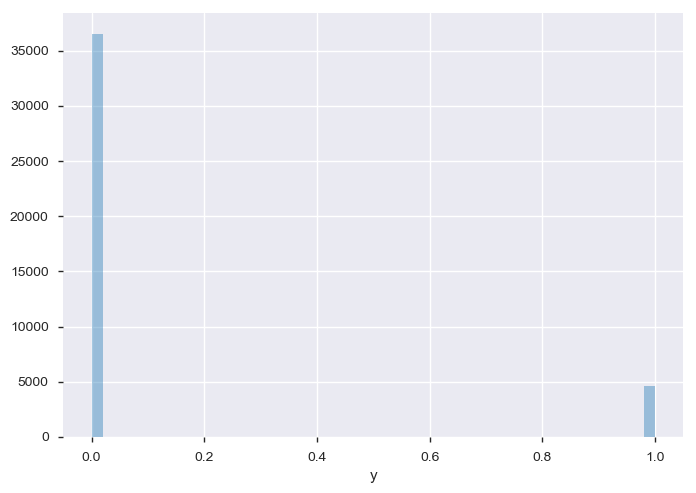

In [82]:
import seaborn as sns
sns.distplot(y,kde=False)

In [ ]:
--------------------------------------------------------------------------------------------------------------------------

In [ ]:
Arriba usamos advanced metods para sacar predictability, ahora hay q aproaach it con planes:
    #Answer, cuales son los mejores variables? usa gini methods mas scatter

In [ ]:
Sample=pd.DataFrame(bank.sample(n=350,random_state=1))

In [ ]:
Sample.head()

In [ ]:
type(Sample)

In [ ]:
SampleR=(Sample.iloc[:,13:20])

In [ ]:
df = pd.DataFrame(SampleR, columns =['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']) 
#'campaign','pdays','previous','poutcome',

In [ ]:
df.head()

In [ ]:
SampleR2=Sample.iloc[:,7:13]



In [ ]:
df2=pd.DataFrame(SampleR2, columns =['contact','month','day_of_week','campaign','pdays','previous']) 

In [ ]:
df2k=pd.DataFrame(Sample.iloc[:,19],columns=['y'])

In [ ]:
result=pd.concat([df2,df2k],axis=1)

In [ ]:
result

In [ ]:
pd.plotting.scatter_matrix(df,c=df.y, figsize=(20,10));

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
result2=pd.concat([df3,df2k],axis=1)

In [ ]:
sns.set()
sns.pairplot(result2,size=2.0)
plt.show()

#Education and age appear to be also good

In [ ]:
X.head()

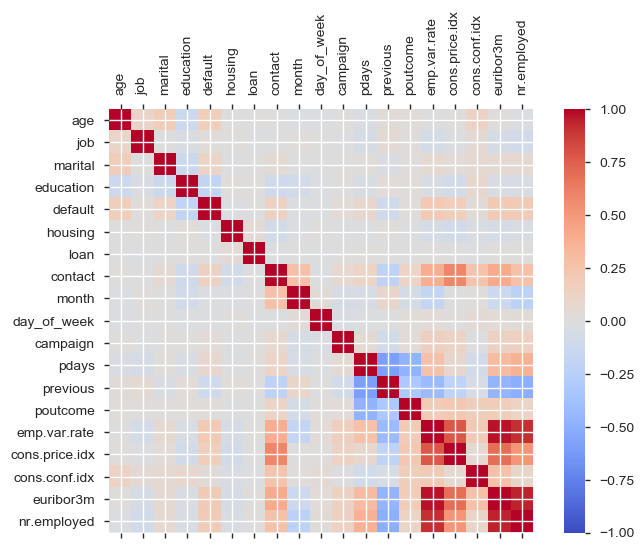

In [83]:
corr = X.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(X.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(X.columns)
ax.set_yticklabels(X.columns)
plt.show()

In [ ]:
X_1=pd.DataFrame(X, columns=['previous','month','day_of_week','marital','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']) 

In [ ]:
corr = X_1.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(X_1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(X_1.columns)
ax.set_yticklabels(X_1.columns)
plt.show()

In [ ]:
##Hay q armar el ensemble; 

#empezamos con tree on both X & X reduced

In [ ]:
max_depth = range(1,35)

In [ ]:
B=len(max_depth)

In [ ]:
max_depth

In [ ]:
Accuraccy_CV_scores = []

In [ ]:
m

In [ ]:
Accuraccy_CV_scores

In [ ]:
Accuraccy_scores = []

In [ ]:
from sklearn.tree import DecisionTreeClassifier
for i in max_depth:
    treeclf = DecisionTreeClassifier(max_depth=max_depth[i], random_state=1)
    treeclf.fit(X2, y2)
    y_pred = treeclf.predict(X2)
    print(metrics.accuracy_score(y2, y_pred))

In [ ]:
for i in max_depth:
    treeclf = DecisionTreeClassifier(max_depth=max_depth[i-1], random_state=1)
    CV=cross_val_score(treeclf, X, y, cv=2)
    print(np.mean(CV))




In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25)

In [ ]:
treeclf = DecisionTreeClassifier(max_depth=6, random_state=1)
treeclf.fit(x_train, y_train)
y_pred = treeclf.predict(x_test)

In [ ]:

from sklearn.metrics import roc_curve, auc
#needed to us y & y_pred, need y_test vs y_pred it then non matching sizes
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
import itertools

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(x_train, y_train)
   train_pred = dt.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)


In [ ]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [ ]:
#We see that our model overfits for large depth values. The tree perfectly predicts all of the train data, however, 
#it fails to generalize the findings for new data

In [ ]:
feature_cols= ['age', 'job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [ ]:
from sklearn.tree import export_graphviz


In [ ]:
treeclf = DecisionTreeClassifier(max_depth=7, random_state=1)
treeclf.fit(X2, y2)

In [ ]:
# create a GraphViz file
export_graphviz(treeclf, out_file='tree_titanic.dot', feature_names=feature_cols)

In [ ]:
! dot -Tpng tree_titanic.dot -o tree_titanic.png

In [ ]:
from IPython.display import Image

In [ ]:
display(Image('tree_titanic.png'))

In [ ]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print ("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print ("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print ("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print ("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [ ]:
tree_to_code(treeclf, feature_cols)

In [ ]:
#--------------------------------------------------------------------------------------------------

In [84]:
Losderre = pd.read_csv(r'C:\Users\Dell\Desktop\Routput.csv')

 Hay q armar el ensemble; 

#empezamos con tree on both X & X reduced

In [86]:
DeERRE=pd.DataFrame(Losderre)

In [ ]:
DeERRE.head()

In [ ]:
import numpy as np

def is_nan(x):
    return (x is np.nan or x != x)

In [87]:
Final=DeERRE.iloc[0:799347,:]

In [ ]:
##it'l be too big of a table to view so need excell to easily filter

In [ ]:
#Anyhow, determine best vars,k90- use the tree + DeErre to smooth out; let logistic regression handles errors.create final mod

In [ ]:
Final.head()

In [ ]:
Final.head()

In [88]:
import pandas as pd

In [ ]:
Final_agg = Final.groupby([Final.V1]).V1.agg({'count'})

g = Final_agg['count'].groupby(level = 0, group_keys = False)

g_largest = g.nlargest(100)
ge = pd.DataFrame(g_largest.reset_index())
ge

In [ ]:
g.head()

In [ ]:
Final=pd.DataFrame(Final.merge(ge, on='V1', how='left'))

In [ ]:
Final.head()

In [90]:
Porfin=Final.sort_values(by=['count_y'])

KeyError: 'count_y'

In [ ]:
Final2=Porfin.iloc[:,1:11]

In [ ]:
Final2.head(200)

In [89]:
Final2['R1_R2_A_B']=Final2['V5']/39404

NameError: name 'Final2' is not defined

In [ ]:
Final2.head()

In [ ]:
------------------------------------------------------------------------------

In [ ]:
#Ahora busca, por puridad de sort by pt = .97 y largest B1
#primer elijiendo de right not left

In [ ]:
Porfin=Final2.sort_values(by=['V10'],ascending=False)

In [ ]:
Porfin=Porfin.sort_values(by=['V8'],ascending=False)

In [ ]:
Porfin.head(50)


In [ ]:
Porfin2=Porfin[Porfin.V1 != 1]

In [ ]:
Porfin3=Porfin2[Porfin2.V3 != 1]

In [ ]:
Porfin3.head(50)

In [ ]:
Porfin3['pdiff']=abs(Porfin3['V7']-Porfin3['V10'])

In [ ]:
Porfin3.shape

In [ ]:
Porfin3.to_csv('Porfin.csv')

In [ ]:
SortebyV10thneV8=Porfin3.iloc[0:300,]

In [ ]:
SortebyV10thneV8.head()

In [ ]:
------------------
#pero queremos largest determinism...entonces, sorteamos por v5 y v8; descending , despues por el otr ascending

In [ ]:
#Det1=Porfin3.sort_values(by=['V8'],ascending=False)
Det2=Porfin3.loc[(Porfin3.V5<10)]
Det2.head()


In [ ]:
#Det3=Det2.loc[(Det2.V8)>=1]
Det3=Det2.sort_values(by=['V8'],ascending=False)

In [ ]:
Det3
#Is this really the most deterministic trend

In [ ]:
Det4=Porfin3.loc[(Porfin3.V8<10)]
Det4.head()


In [ ]:
#Det3=Det2.loc[(Det2.V8)>=1]
Det5=Det4.sort_values(by=['V5'],ascending=False)

In [ ]:
Det5.head(10)

In [ ]:
#Now sort by R1_R2_A_B's to see best variables--Naaa 

In [ ]:
---------------------------------------------------------------------------------------

In [ ]:
#vamos a elijir a correr log regr..-> buscar errores-> identify them; find common features that those are in vs a regular subset and 
    #build algorm; first identifies that grp..classifies them..then log reg is ran.

In [ ]:
# So primero vamos a correr log functions; to identificar best subset of X

In [ ]:
#On all data:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(multi_class='multinomial',solver='lbfgs')
print (cross_val_score(logreg, X2, y2, cv=10, scoring='accuracy').mean())

#.836 

In [ ]:
#On a tree suggestd subset:
age, job, marital, education, default, housing, loan, contact, month, day_of_week, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed


In [ ]:
#.8363
#All feature columns
feature_cols0= ['age', 'job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [ ]:
#.8350
#Los de el arbol con 7 depth; by order mattering
feature_cols1= ['nr.employed','loan','age','contact','month','pdays','day_of_week','euribor3m','cons.conf.idx','job','education','marital','cons.price.idx','poutcome','campaign','previous','emp.var.rate']


In [ ]:
#.8563 -- And runs alot smoother!!!
#visual test, going to exclude euribirium to see if score gets better
feature_cols2= ['age','job','marital','nr.employed','cons.price.idx','cons.conf.idx']

In [ ]:
#.8345
feature_cols3= ['age','job','marital','nr.employed','cons.price.idx','cons.conf.idx','euribor3m']

In [ ]:
#.851
#we want to add month and days of week 
feature_cols4= ['age','job','marital','nr.employed','cons.price.idx','cons.conf.idx','month','day_of_week']

In [ ]:
X3=X2[feature_cols2]

In [ ]:
y2.shape

In [ ]:
X3.shape

In [ ]:
logreg = LogisticRegression(multi_class='multinomial',solver='lbfgs')
print (cross_val_score(logreg, X3, y2, cv=10, scoring='accuracy').mean())

In [ ]:
#So choose visual test and now do confusion matrix
X_train, X_test, y_train, y_test = train_test_split(X3, y2, random_state=1)
logreg.fit(X_train, y_train)
y_pred_class = logreg.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred_class))



In [ ]:
metrics.confusion_matrix(y_test, y_pred_class)

#Lets take care of Actual yes, Mod said No --> 998 this is the 34K sample size (i.e. No they didn't subscript)

In [ ]:
# plot the predicted probabilities
import matplotlib.pyplot as plt
plt.hist(y_pred_class)
plt.xlabel('Predicted probability of subscribed')
plt.ylabel('Frequency')

In [ ]:
logreg.fit(X3, y2)
y_pred_class = logreg.predict(X3)
print (metrics.accuracy_score(y2, y_pred_class))


In [ ]:
y2=pd.DataFrame(y2)

In [ ]:
y2.reset_index(drop=True, inplace=True)
X3.reset_index(drop=True, inplace=True)
X2.reset_index(drop=True, inplace=True)

In [ ]:
y_pred_class=pd.DataFrame(y_pred_class,columns=['y_pred'])
y_pred_class

In [ ]:
Errors=pd.concat([y2,y_pred_class],axis=1)
Errors=pd.DataFrame(Errors,columns=['y','y_pred'])
Errors.head(20)

In [ ]:
ErrsIndex=Errors.index[Errors['y']!=Errors['y_pred']].tolist()
len(ErrsIndex)

In [ ]:
errors=y2.iloc[ErrsIndex]

In [ ]:
#todas las features
X2errors=X2.iloc[ErrsIndex,:]

In [ ]:
X3errors=X3.iloc[ErrsIndex,:]

In [ ]:
X3errors.shape

In [ ]:
X2errors.hist()

In [ ]:
if marital =4 or 2,  or price dex = 30, or job =1 

In [ ]:
Det5.head(10)

In [ ]:
ErrsIndex=Det5.loc[(Det5.V1)==13]

In [ ]:
ErrsIndex.shape

In [ ]:
ErrsIndex.head(200)

In [ ]:
ErrsIndex2=ErrsIndex.loc[(ErrsIndex.V2)>=23]

In [ ]:
ErrsIndex2.head(200)

In [ ]:
-----------------------------------------------------------

In [ ]:
bank.head()

In [ ]:
X2.head()

In [ ]:
X2['employed']=X2['nr.employed']

In [ ]:
X2.drop(['nr.employed'], axis=1)

In [ ]:
#ok ahora usa X2 para mappear values a target y despues usa X3; indices no usadas en previ analysis, para fit tu model
#configure error manually

In [ ]:
Loan_1=X2.loc[(X2.loan)==1]
Loan_1.shape

In [ ]:
Loan_1_2=Loan_1.loc[(Loan_1.employed)==5191]
Loan_1_2.shape

In [ ]:
Loan_1_2_x = X2[((X2['loan'] ==1) & (X2['employed'] == 5191))]
Loan_1_2_x.shape

In [ ]:
LoansIdx=Loan_1_2_x.index.tolist()

In [ ]:
sdas=X2.iloc[LoansIdx,:]

In [ ]:
sdas.shape

In [ ]:
sdas['target']=0

In [ ]:
X2.shape

In [ ]:
X7 = X2.drop(LoansIdx)
X7.shape

In [ ]:
Loan_1_2['target']='NA'

In [ ]:
Loan_1_2.head()

In [ ]:
LoansIdx=Loan_1_2.index
LoansIdx

In [ ]:
X4=pd.DataFrame(X2)

In [ ]:
X4['target']=999

In [ ]:
X4.shape

In [ ]:
for i in LoansIdx:
    X4.iloc[i,20]==0

## X4[LoansIdx

In [ ]:
 X4.iloc[77,:]

In [ ]:
X2.shape

In [ ]:
y2.shape

In [ ]:
#Table es todas las features; namely X2
def uniquemodel(Table,TableX,y):
    
    Loan_1_2 = pd.DataFrame(Table[(Table['loan'] ==1) & (Table['employed'] == 5191)])
    LoansIdx=Loan_1_2.index.tolist()
    Loan_1_2['target']=0
    Table2 = Table.drop(LoansIdx)
    TableX2 = TableX.drop(LoansIdx)
    y2=y.drop(LoansIdx)
    Age1 = pd.DataFrame(Table2[(Table2['age'] ==32) & (Table2['education'] == 0)])
    Agedx= Age1.index.tolist()
    Age1['target']=0
    Table3 = Table2.drop(Agedx)
    TableX3 = TableX2.drop(Agedx)
    y3=y2.drop(Agedx)
    
    Age2 = pd.DataFrame(Table3[(Table3['age'] ==23) & (Table3['education'] == 0)])
    Agedx2= Age2.index.tolist()
    Age2['target']=0
    Table4 = Table3.drop(Agedx2)
    TableX4 = TableX3.drop(Agedx2)
    y4=y3.drop(Agedx2)
    
    Age3 = pd.DataFrame(Table4[(Table4['age'] ==27) & (Table4['euribor3m'] == 4.857)])
    Agedx3= Age3.index.tolist()
    Age3['target']=0
    Table5 = Table4.drop(Agedx3)
    TableX5 = TableX4.drop(Agedx3)
    y5=y4.drop(Agedx3) 
        
    Age4 = pd.DataFrame(Table5[(Table4['age'] ==28) & (Table4['cons.conf.idx'] == -41.8)])
    Agedx4 = Age4.index.tolist()
    Age4['target']=0
    Table6 = Table5.drop(Agedx4)
    TableX6 = TableX5.drop(Agedx4)
    y6=y5.drop(Agedx4)
    
    
    M1=pd.concat([Loan_1_2,Age1,Age2,Age3,Age4])
    return(M1)
    

In [ ]:
M1=uniquemodel(X2,X3,y2)

In [ ]:
M1.shape

In [ ]:
#Ran function above to return y2_trimmed
Xinall=uniquemodel(X2,X3,y2)

In [ ]:
YFinall.shape

In [ ]:
Xinall=Xinall.drop(['pred'], axis=1)

In [ ]:
Xinall.shape

In [ ]:
logreg = LogisticRegression(multi_class='multinomial',solver='lbfgs')
print (cross_val_score(logreg, Xinall, YFinall, cv=10, scoring='accuracy').mean())

In [ ]:
logreg.fit(Xinall, YFinall)
y_pred_class = logreg.predict(Xinall)
print (metrics.accuracy_score(YFinall, y_pred_class))

In [ ]:
metrics.confusion_matrix(YFinall, y_pred_class)

In [ ]:
len(y_pred_class)